4) Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains
information about various houses in Boston through different parameters. There are 506 samples and
14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [10]:
Data = pd.read_csv("/content/cities_magicbricks_rental_prices.csv")

In [11]:
Data.head()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0


In [12]:
# checking the shape of the data
Data.shape  # we have total 7691 row and 10 column

(7691, 10)

In [13]:
# now we are going to check the total column name in list
print(Data.columns.values)
print("Total Column :- ",len(Data.columns.values))

['house_type' 'locality' 'city' 'area' 'beds' 'bathrooms' 'balconies'
 'furnishing' 'area_rate' 'rent']
Total Column :-  10


### Explore the Data

In [14]:
# Checking the Missing value in the dataset
Data.isnull().sum()

# From bellow data show that there is no any missing value in the column (So move forward in next step:))

,0
house_type,0
locality,0
city,0
area,0
beds,0
bathrooms,0
balconies,0
furnishing,0
area_rate,0
rent,0


In [15]:
# Understand the Datatype of the every column
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691 entries, 0 to 7690
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   house_type  7691 non-null   object 
 1   locality    7691 non-null   object 
 2   city        7691 non-null   object 
 3   area        7691 non-null   float64
 4   beds        7691 non-null   int64  
 5   bathrooms   7691 non-null   int64  
 6   balconies   7691 non-null   int64  
 7   furnishing  7691 non-null   object 
 8   area_rate   7691 non-null   float64
 9   rent        7691 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 601.0+ KB


In [16]:
Data['house_type'] = Data['house_type'].astype("string")
Data['locality'] = Data['locality'].astype("string")
Data['city'] = Data['city'].astype("string")
Data['furnishing'] = Data['furnishing'].astype("string")

In [17]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691 entries, 0 to 7690
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   house_type  7691 non-null   string 
 1   locality    7691 non-null   string 
 2   city        7691 non-null   string 
 3   area        7691 non-null   float64
 4   beds        7691 non-null   int64  
 5   bathrooms   7691 non-null   int64  
 6   balconies   7691 non-null   int64  
 7   furnishing  7691 non-null   string 
 8   area_rate   7691 non-null   float64
 9   rent        7691 non-null   float64
dtypes: float64(3), int64(3), string(4)
memory usage: 601.0 KB


In [18]:
Data['house_type'].unique()

<StringArray>
[                     '2 BHK Flat for Rent in Oberoi Woods, Goregaon East, Mumbai',
                         '1 BHK Flat for Rent in Sapphire Lakeside, Powai, Mumbai',
                                            '1 BHK House for Rent in Mundhwa Pune',
                                           '2 BHK Flat for Rent in Hingna, Nagpur',
          '1 BHK Flat for Rent in Unique Star Harsh Vihar, Mira Road Area, Mumbai',
                                        '1 BHK House for Rent in Jakkur Bangalore',
                             '3 BHK Flat for Rent in Chittaranjan Park, New Delhi',
                '3 BHK Flat for Rent in Soami Nagar South, Soami Nagar, New Delhi',
                                           '1 BHK House for Rent in Hadapsar Pune',
                          '1 BHK Flat for Rent in Riverdale Suites, Kharadi, Pune',
 ...
                                                '1 BHK Flat for Rent in Sus, Pune',
 '1 BHK Flat for Rent in Royal Palms Diamond Isle Phase I

In [19]:
Data['BHK_Type'] = Data['house_type'].apply(lambda x: re.search(r'\d+\s*(BHK|RK)', x, re.IGNORECASE).group() if re.search(r'\d+\s*(BHK|RK)', x, re.IGNORECASE) else "Unknown")


In [20]:
Data['BHK_Type'].tail(100)

,BHK_Type
7591,3 BHK
7592,4 BHK
7593,3 BHK
7594,1 BHK
7595,4 BHK
...,...
7686,3 BHK
7687,2 BHK
7688,2 BHK
7689,1 BHK


In [21]:
Data

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent,BHK_Type
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0,2 BHK
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0,1 BHK
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0,1 BHK
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0,2 BHK
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0,1 BHK
...,...,...,...,...,...,...,...,...,...,...,...
7686,"3 BHK Flat for Rent in Saket, New Delhi",Saket,New Delhi,1750.0,3,3,0,Furnished,27.0,47000.0,3 BHK
7687,"2 BHK Flat for Rent in Phase 7 JP Nagar, Banga...",Phase 7 JP Nagar,Bangalore,1050.0,2,2,2,Semi-Furnished,27.0,28000.0,2 BHK
7688,"2 BHK Flat for Rent in Malpani Vivanta, Balewa...",Balewadi,Pune,734.0,2,2,2,Unfurnished,48.0,35000.0,2 BHK
7689,"1 BHK Flat for Rent in Shalimar bagh, New Delhi",Shalimar bagh,New Delhi,400.0,1,1,0,Semi-Furnished,38.0,15000.0,1 BHK


In [22]:
print(Data['locality'].unique())
print("Total length",len(Data['locality'].unique()))
oLabelEncoder = LabelEncoder()
Data['localityEncoded'] = oLabelEncoder.fit_transform(Data['locality'])

<StringArray>
[      'Goregaon East',               'Powai',             'Mundhwa',
              'Hingna',           'Mira Road',              'Jakkur',
   'Chittaranjan Park',   'Soami Nagar South',            'Hadapsar',
             'Kharadi',
 ...
      'Pragathi Nagar',      'Swasthya Vihar',             'Chhawla',
     'Dabri Extension',              'Gondia',  'Shri Krishna Nagar',
    'Samaspur Village', 'Anjanapura Township', 'Qutub Vihar Phase 2',
          'Govindpura']
Length: 1984, dtype: string
Total length 1984


In [23]:
print(Data['city'].unique())
print("Total length :- ",len(Data['city'].unique()))
oLabelEncoder = LabelEncoder()
Data['cityEncoded'] = oLabelEncoder.fit_transform(Data['city'])

<StringArray>
['Mumbai', 'Pune', 'Nagpur', 'Bangalore', 'New Delhi']
Length: 5, dtype: string
Total length :-  5


In [24]:
print(Data['furnishing'].unique())
print("Total length :- ",len(Data['furnishing'].unique()))
oLabelEncoder = LabelEncoder()
Data['furnishingEncoded'] = oLabelEncoder.fit_transform(Data['furnishing'])

<StringArray>
['Semi-Furnished', 'Unfurnished', 'Furnished']
Length: 3, dtype: string
Total length :-  3


In [25]:
print(Data['BHK_Type'].unique())
print("Total length :- ",len(Data['BHK_Type'].unique()))
oLabelEncoder = LabelEncoder()
Data['BHK_TypeEncoded'] = oLabelEncoder.fit_transform(Data['BHK_Type'])

['2 BHK' '1 BHK' '3 BHK' '4 BHK' '5 BHK' '10 BHK' '8 BHK' '7 BHK' '6 BHK']
Total length :-  9


In [26]:
Data.head()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent,BHK_Type,localityEncoded,cityEncoded,furnishingEncoded,BHK_TypeEncoded
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0,2 BHK,585,1,1,2
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0,1 BHK,1389,1,1,0
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0,1 BHK,1179,4,2,0
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0,2 BHK,670,2,2,2
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0,1 BHK,1146,1,2,0


### Checking the Correlation between the Some column

In [27]:
checking_Data = Data[['localityEncoded','cityEncoded','furnishingEncoded','BHK_TypeEncoded','area_rate','balconies','bathrooms','beds','area','rent']]

In [28]:
CorrData = checking_Data.corr()
CorrData

,localityEncoded,cityEncoded,furnishingEncoded,BHK_TypeEncoded,area_rate,balconies,bathrooms,beds,area,rent
localityEncoded,1.000000,0.094312,0.016716,-0.011589,-0.027965,0.005253,-0.024606,-0.018327,-0.011015,-0.015245
cityEncoded,0.094312,1.000000,0.093305,-0.127627,-0.145132,0.004278,-0.163518,-0.131277,-0.125663,-0.171352
furnishingEncoded,0.016716,0.093305,1.000000,-0.121486,-0.086916,-0.042480,-0.130125,-0.118684,-0.090037,-0.124648
BHK_TypeEncoded,-0.011589,-0.127627,-0.121486,1.000000,0.093322,0.405263,0.814766,0.935948,0.480423,0.413771
area_rate,-0.027965,-0.145132,-0.086916,0.093322,1.000000,-0.004592,0.160051,0.111820,0.022209,0.507104
balconies,0.005253,0.004278,-0.042480,0.405263,-0.004592,1.000000,0.442145,0.418587,0.296145,0.179181
bathrooms,-0.024606,-0.163518,-0.130125,0.814766,0.160051,0.442145,1.000000,0.850310,0.535668,0.532681
beds,-0.018327,-0.131277,-0.118684,0.935948,0.111820,0.418587,0.850310,1.000000,0.516329,0.473695
area,-0.011015,-0.125663,-0.090037,0.480423,0.022209,0.296145,0.535668,0.516329,1.000000,0.433513
rent,-0.015245,-0.171352,-0.124648,0.413771,0.507104,0.179181,0.532681,0.473695,0.433513,1.000000


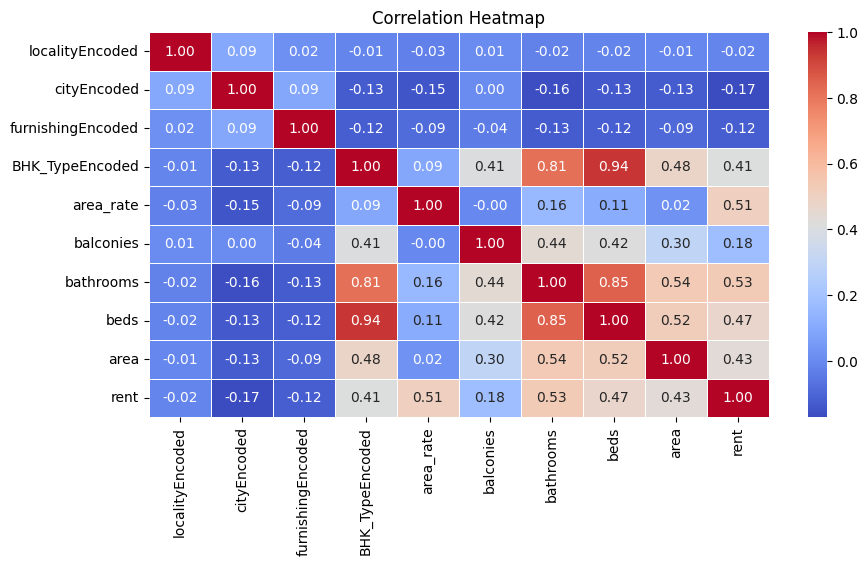

In [29]:
plt.figure(figsize=(10, 5))
sns.heatmap(CorrData, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [30]:
# Getting top feture selection for model and target selection
x = Data[['localityEncoded','cityEncoded','furnishingEncoded','BHK_TypeEncoded','area_rate','balconies','bathrooms','beds','area']]
y = Data['rent']


In [31]:
x = Data[['BHK_TypeEncoded','area_rate','balconies','bathrooms','area']]
y = Data['rent']

In [32]:
x.shape

(7691, 5)

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
print("x_train :- ",x_train.shape)
print("y_train :- ",y_train.shape)
print("x_test :- ",x_test.shape)
print("y_test :- ",y_test.shape)

x_train :-  (6152, 5)
y_train :-  (6152,)
x_test :-  (1539, 5)
y_test :-  (1539,)


In [58]:
oStandardScalerXTrain = StandardScaler()
oStandardScalerXTest = StandardScaler()

In [59]:
x_train = oStandardScalerXTrain.fit_transform(x_train)
x_test = oStandardScalerXTest.fit_transform(x_test)

In [60]:
oModelLinearReg = LinearRegression()

In [62]:
oModelLinearReg.fit(x_train,y_train)

LinearRegression()

In [63]:
y_pred = oModelLinearReg.predict(x_test)

In [67]:
y_pred

array([167331.29089714, 108296.39442798, 378108.34126897, ...,
        -6726.0865739 ,  39898.9049799 , -15785.16033043])

In [68]:
y_test

,rent
2389,240000.0
3034,40000.0
6973,130000.0
6587,78000.0
5476,80000.0
...,...
5548,5500.0
1201,11000.0
4047,11000.0
2939,41000.0


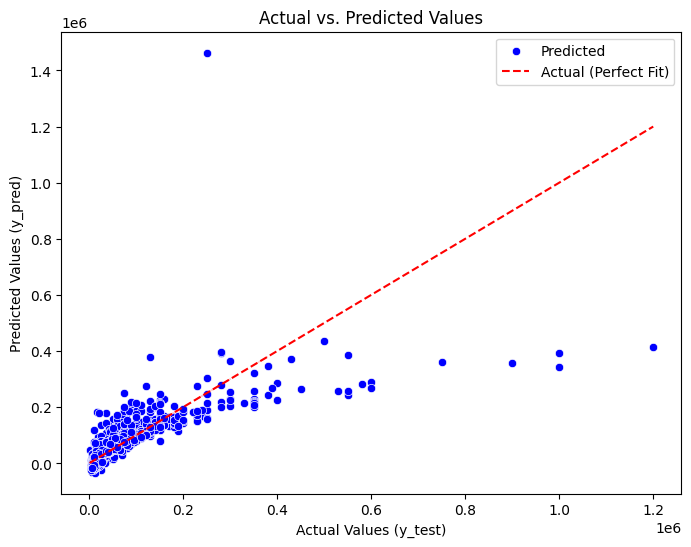

In [73]:
# Create a scatter plot using seaborn
plt.figure(figsize=(8, 6))  # Set figure size
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted')  # Plot predicted values
sns.lineplot(x=y_test, y=y_test, color='red', label='Actual (Perfect Fit)', linestyle='dashed')  # Ideal line

# Labels and title
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")

# Show legend and plot
plt.legend()
plt.show()

In [74]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [78]:
print("MSE (Mean Squared Error) :-",mse )
print("R-squared (R2) :-",r2)

MSE (Mean Squared Error) :- 3588184217.00372
R-squared (R2) :- 0.5211997009580401


In [82]:
aaccuracy = oModelLinearReg.score(x_test,y_test)
print("Accuracy :- ",aaccuracy*100,"%")

Accuracy :-  52.119970095804014 %
